# COVID-19: A Comprehensive Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib .pyplot as plt
import matplotlib.dates as mdates


In [2]:
df1= pd.read_csv("C:\\Users\ABDUL SAMAD\\Desktop\\New folder\\covid_19_clean_complete.csv")
df2=pd.read_csv("C:\\Users\\ABDUL SAMAD\\Desktop\\New folder\\worldometer_data.csv")



## 1. Combine the DataFrames into one with the same index

In [3]:
covid_df= pd.concat([df1, df2])
covid_df



,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,...,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0.0,0.0,0.0,0.0,Eastern Mediterranean,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Albania,41.15330,20.168300,2020-01-22,0.0,0.0,0.0,0.0,Europe,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0.0,0.0,0.0,0.0,Africa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0.0,0.0,0.0,0.0,Europe,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0.0,0.0,0.0,0.0,Africa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,NaN,Montserrat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0
205,NaN,Caribbean Netherlands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0
206,NaN,Falkland Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0
207,NaN,Vatican City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe,...,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN


## 2.cleaning the data for analysis



In [4]:
covid_df.isnull().sum()

Province/State      34613
Country/Region          0
Lat                   209
Long                  209
Date                  209
Confirmed             209
Deaths                209
Recovered             209
Active                209
WHO Region             25
Continent           49069
Population          49069
TotalCases          49068
NewCases            49273
TotalDeaths         49089
NewDeaths           49274
TotalRecovered      49072
NewRecovered        49274
ActiveCases         49072
Serious,Critical    49155
Tot Cases/1M pop    49069
Deaths/1M pop       49090
TotalTests          49086
Tests/1M pop        49086
dtype: int64

In [5]:
# Dropping certain columns
columns_to_drop = ['Confirmed', 'Deaths', 'Recovered','Active','Province/State']  
covid_df.drop(columns=columns_to_drop, inplace=True)


In [6]:
# Dropping certain columns
columns_to_drop = ['NewCases','NewDeaths','NewRecovered','Serious,Critical',]  
covid_df.drop(columns=columns_to_drop, inplace=True)


In [7]:

covid_df

,Country/Region,Lat,Long,Date,WHO Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
0,Afghanistan,33.93911,67.709953,2020-01-22,Eastern Mediterranean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,41.15330,20.168300,2020-01-22,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,28.03390,1.659600,2020-01-22,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Andorra,42.50630,1.521800,2020-01-22,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,-11.20270,17.873900,2020-01-22,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,NaN,NaN,NaN,NaN,North America,4992.0,13.0,1.0,10.0,2.0,2604.0,200.0,61.0,12220.0
205,Caribbean Netherlands,NaN,NaN,NaN,NaN,North America,26247.0,13.0,NaN,7.0,6.0,495.0,NaN,424.0,16154.0
206,Falkland Islands,NaN,NaN,NaN,NaN,South America,3489.0,13.0,NaN,13.0,0.0,3726.0,NaN,1816.0,520493.0
207,Vatican City,NaN,NaN,NaN,Europe,Europe,801.0,12.0,NaN,12.0,0.0,14981.0,NaN,NaN,NaN


In [8]:
#to remove duplicate rows
covid_df.dropna(subset=['Country/Region'], inplace=True)
covid_df.drop_duplicates(inplace=True)



In [9]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49277 entries, 0 to 208
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    49277 non-null  object 
 1   Lat               49068 non-null  float64
 2   Long              49068 non-null  float64
 3   Date              49068 non-null  object 
 4   WHO Region        49252 non-null  object 
 5   Continent         208 non-null    object 
 6   Population        208 non-null    float64
 7   TotalCases        209 non-null    float64
 8   TotalDeaths       188 non-null    float64
 9   TotalRecovered    205 non-null    float64
 10  ActiveCases       205 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
dtypes: float64(11), object(4)
memory usage: 6.0+ MB


## 3.Calculate basic statistics

In [10]:
# Calculate basic statistics for specific columns
basic_stats = covid_df[['TotalCases', 'TotalDeaths', 'TotalRecovered']].describe()

# Display the basic statistics
print(basic_stats)

         TotalCases    TotalDeaths  TotalRecovered
count  2.090000e+02     188.000000    2.050000e+02
mean   9.171850e+04    3792.590426    5.887898e+04
std    4.325867e+05   15487.184877    2.566984e+05
min    1.000000e+01       1.000000    7.000000e+00
25%    7.120000e+02      22.000000    3.340000e+02
50%    4.491000e+03     113.000000    2.178000e+03
75%    3.689600e+04     786.000000    2.055300e+04
max    5.032179e+06  162804.000000    2.576668e+06


In [11]:
# Calculating total cases
total_cases = covid_df[ 'TotalCases'].sum()
total_death=covid_df['TotalDeaths'].sum()
total_recovered=covid_df['TotalRecovered'].sum()
print("sum of total reported cases;",total_cases)
print("sum of total reported death ;",total_death)
print("sum of total reported recoverd;",total_recovered)

sum of total reported cases; 19169166.0
sum of total reported death ; 713007.0
sum of total reported recoverd; 12070191.0


## 5.Perform Data Analysis:



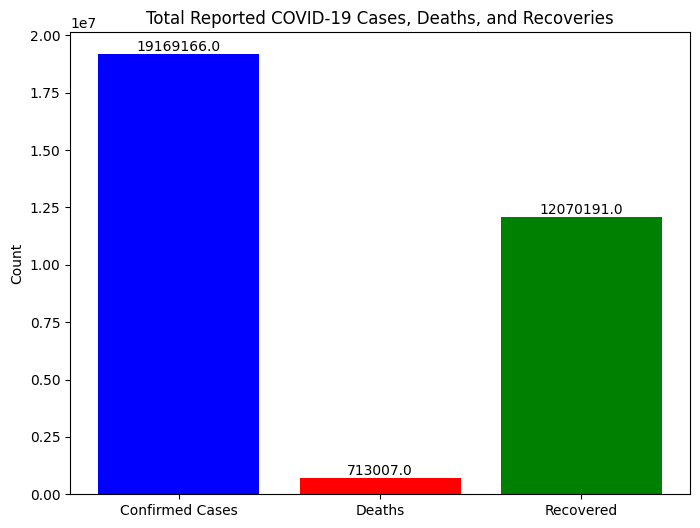

In [12]:

total_cases = covid_df['TotalCases'].sum()
total_deaths = covid_df['TotalDeaths'].sum()
total_recovered = covid_df['TotalRecovered'].sum()

# Data for the bar chart
categories = ['Confirmed Cases', 'Deaths', 'Recovered']
values = [total_cases, total_deaths, total_recovered]
colors = ['blue', 'red', 'green']

# Creating a figure and axis for the bar chart
fig, ax = plt.subplots(figsize=(8, 6))

# Create the bar chart
bars = ax.bar(categories, values, color=colors)


# Add labels and values on top of the bars
for bar, value in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom')


# Set the title and labels
ax.set_title('Total Reported COVID-19 Cases, Deaths, and Recoveries')
ax.set_ylabel('Count')

# Show the bar chart
plt.show()


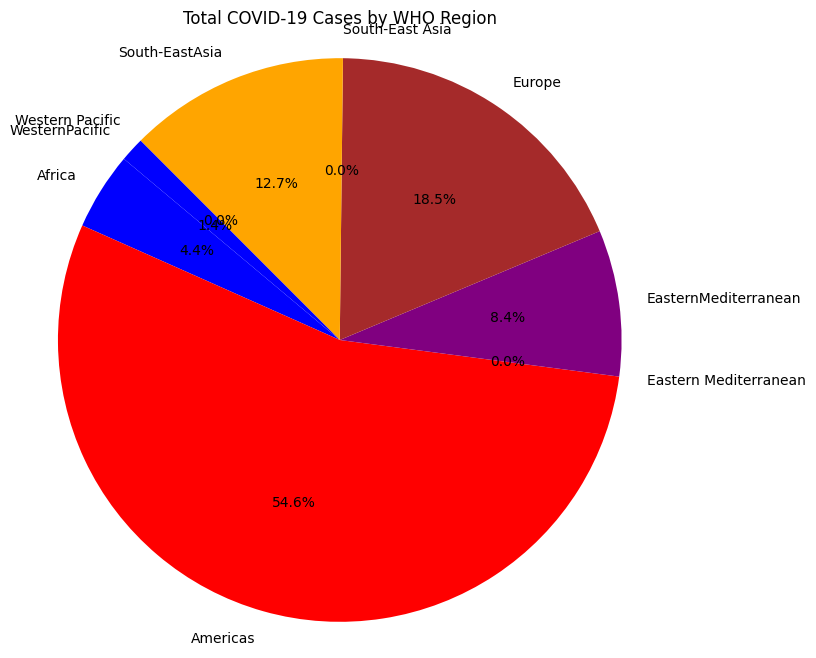

In [13]:

# Calculating total cases by WHO Region
total_cases_by_region = covid_df.groupby('WHO Region')['TotalCases'].sum()

# Create a figure and axis for the pie chart
plt.figure(figsize=(8, 8))
ax = plt.gca()

# Data for the pie chart
labels = total_cases_by_region.index
sizes = total_cases_by_region.values
colors =  ['blue','red','green', 'purple', 'brown', 'pink', 'orange','cyan']

# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  

# Set the title
plt.title('Total COVID-19 Cases by WHO Region')

# Show the pie chart
plt.show()


In [14]:
# Filling missing values with mean
covid_df['TotalCases'].fillna(covid_df['TotalCases'].mean(), inplace=True)

# Filling missing values with median
covid_df['TotalDeaths'].fillna(covid_df['TotalDeaths'].median(), inplace=True)

# Filling missing values in a categorical column with mode
covid_df['TotalRecovered'].fillna(covid_df['TotalRecovered'].median(), inplace=True)


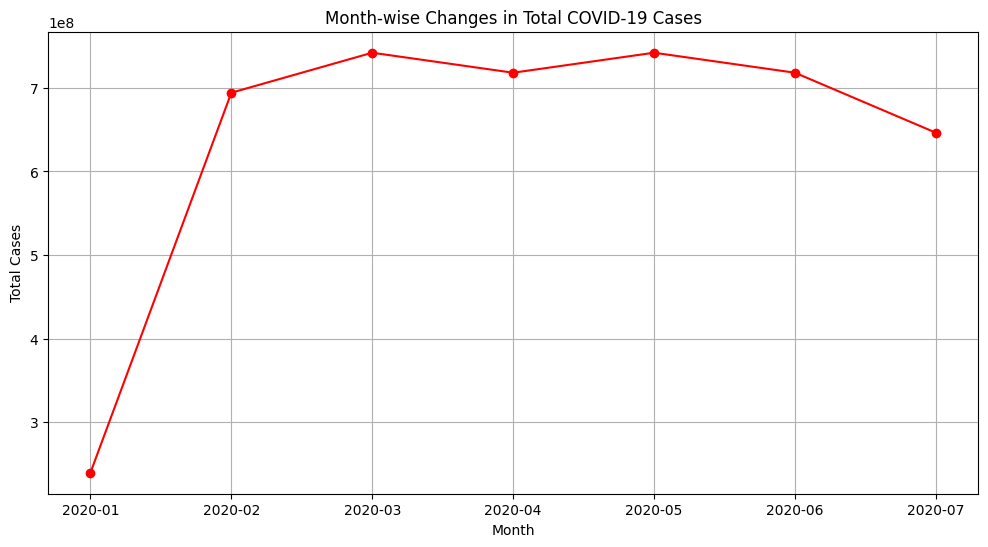

In [15]:

# Ensuring that the 'Date' column is of datetime type
covid_df['Date'] = pd.to_datetime(covid_df['Date'])

# Group the data by month and calculate the total cases for each month
monthly_data = covid_df.groupby(covid_df['Date'].dt.to_period('M')).agg({'TotalCases': 'sum'})

# Convert the 'Period' objects to strings for plotting
monthly_data.index = monthly_data.index.strftime('%Y-%m')

# Create a figure and axis for the line chart
plt.figure(figsize=(12, 6))
ax = plt.gca()

# Create the line chart for month-wise changes in total cases
plt.plot(monthly_data.index, monthly_data['TotalCases'], marker='o', color='red', linestyle='-', markersize=6)

# Set the title and labels
plt.title('Month-wise Changes in Total COVID-19 Cases')
plt.xlabel('Month')
plt.ylabel('Total Cases')


# Show the line chart
plt.grid(True)
plt.show()


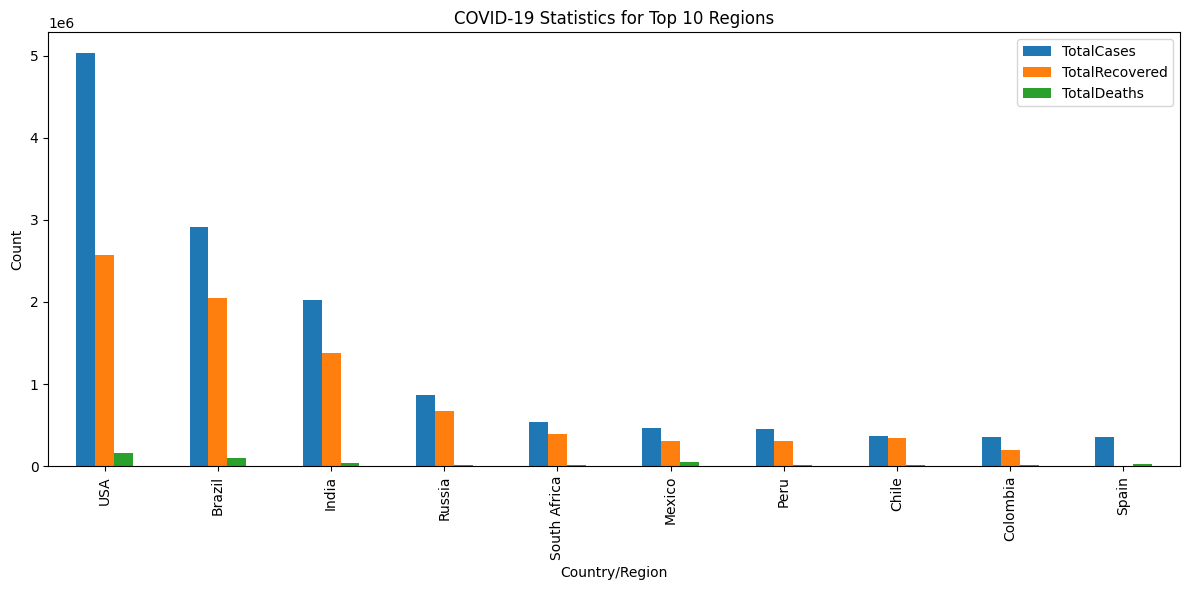

In [16]:


# Filter the DataFrame to include rows where 'Country/Region', 'TotalCases', 'TotalRecovered', and 'TotalDeaths'
filtered_df = covid_df[['Country/Region', 'TotalCases', 'TotalRecovered', 'TotalDeaths']]

# Group data by 'Country/Region' and calculate the maximum values of 'TotalCases', 'TotalRecovered', and 'TotalDeaths'
grouped_df = filtered_df.groupby('Country/Region').max()

# Sort the DataFrame by 'TotalCases' in descending order
sorted_df = grouped_df.sort_values(by='TotalCases', ascending=False)

# Select the top 10 regions
top_10_regions = sorted_df.head(10)

# Create a bar chart for 'TotalCases', 'TotalRecovered', and 'TotalDeaths' by 'Country/Region' for the top 10 regions
top_10_regions.plot(kind='bar', figsize=(12, 6))

# Set the title and labels
plt.title('COVID-19 Statistics for Top 10 Regions')
plt.xlabel('Country/Region')
plt.ylabel('Count')

# Show the bar chart
plt.tight_layout()
plt.show()




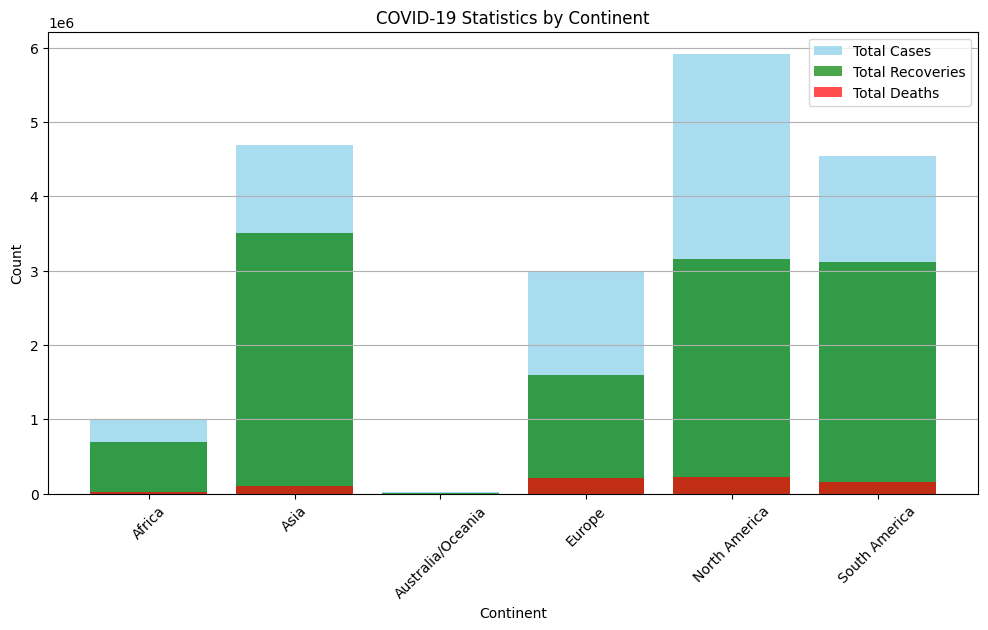

In [17]:
# Group data by 'Continent' and calculate total cases, total recoveries, and total deaths
grouped_data = covid_df.groupby('Continent').agg({
    'TotalCases': 'sum',
    'TotalRecovered': 'sum',
    'TotalDeaths': 'sum'
}).reset_index()

# Create a bar chart to visualize the aggregated data
plt.figure(figsize=(12, 6))

plt.bar(grouped_data['Continent'], grouped_data['TotalCases'], label='Total Cases', color='skyblue', alpha=0.7)
plt.bar(grouped_data['Continent'], grouped_data['TotalRecovered'], label='Total Recoveries', color='green', alpha=0.7)
plt.bar(grouped_data['Continent'], grouped_data['TotalDeaths'], label='Total Deaths', color='red', alpha=0.7)

plt.title('COVID-19 Statistics by Continent')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.legend()

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.grid(axis='y')
plt.show()


## Correlation Analysis

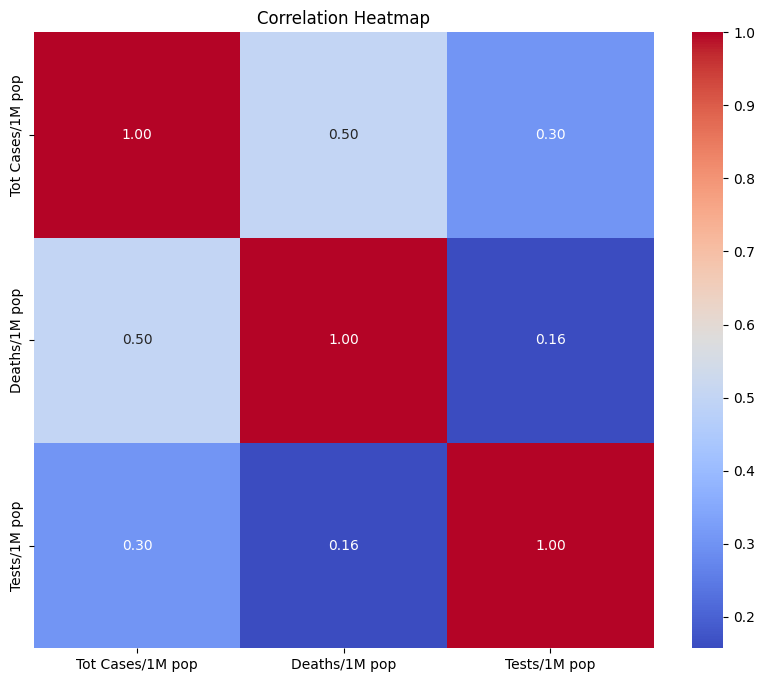

In [21]:

# Select the relevant columns for correlation analysis
selected_columns = covid_df[[ 'Tot Cases/1M pop','Deaths/1M pop','Tests/1M pop']]

# Calculate correlations between the selected columns
correlation_matrix = selected_columns.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


